In [1]:
import networkx as nx
import ndlib.models.epidemics as ep
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd

from sklearn.neighbors import NearestNeighbors

import io
import pickle
import zipfile

###########
# import our libraries
from blue_conduit_spatial.utilities import *
from blue_conduit_spatial.evaluation import *
from blue_conduit_spatial.distance_matrix import *

########### set random state
np.random.seed(297)

In [2]:
#build subgraph
train_indices, test_indices, train_distances, test_distances = load_train_test_dist_matrices()
n_subgraph = 50
subgraph = test_distances[:n_subgraph,:n_subgraph]

FileNotFoundError: [Errno 2] No such file or directory: '../data/processed/train_indices.npy'

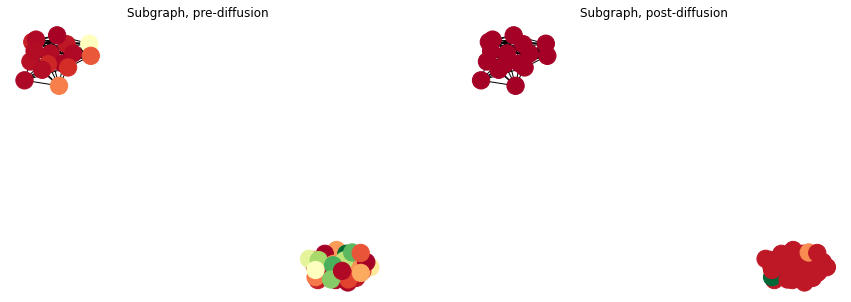

In [4]:
# load jared model predictions
jared_train_pred = pd.read_csv(f'{load_dir}/predictions/jared_train_yhat.csv').values
jared_test_pred = pd.read_csv(f'{load_dir}/predictions/jared_test_yhat.csv').values

def diffusion(subgraph):

    g = nx.from_numpy_array(subgraph)
    pos = nx.spring_layout(g)

    subgraph_pre_diffusion_probs = jared_test_pred[:n_subgraph,1]

    nn = NearestNeighbors(n_neighbors=2, metric='precomputed')
    nn.fit(subgraph)

    neighbor_distances, neighbor_indices = nn.kneighbors()
    
    # UPDATE THIS LINE TO CHANGE HOW THE DISTANCE INFLUENCES THE WEIGHT
    neighbor_weights = 1/(1 + neighbor_distances)

    
    # UPDATE THIS LINE TO CHANGE HOW WE INCORPORATE NEIGHBOR PROBABILITIES
    outputs = np.average(subgraph_pre_diffusion_probs[neighbor_indices], axis=1, weights = neighbor_weights)
    
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    
    nx.draw(g, pos, node_color=1-subgraph_pre_diffusion_probs, cmap = cm.RdYlGn, ax=ax[0])
    ax[0].set_title('Subgraph, pre-diffusion')
    #plt.show()

    nx.draw(g, pos, node_color=1-outputs, cmap = cm.RdYlGn, ax=ax[1])
    ax[1].set_title('Subgraph, post-diffusion')
    
    
    plt.show()
    
diffusion(subgraph)

# big problems
# consistent color scale